# Task1

In [205]:
# Import necessary libraries
import urllib.request
import os
import zipfile
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Task 1

In [206]:
# URL of the Superconductivity dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip"
#url = "https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data"

# Directory to save the downloaded file
download_dir = "superconductivity_data"

# Create the directory if it doesn't exist
os.makedirs(download_dir, exist_ok=True)

# Download the dataset as a zip file
zip_file_path = os.path.join(download_dir, "superconduct.zip")
urllib.request.urlretrieve(url, zip_file_path)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(download_dir)

# List the files in the downloaded directory
file_list = os.listdir(download_dir)
print("Files downloaded and extracted:")
for file in file_list:
    print(file)

# Remove the zip file if no longer needed
os.remove(zip_file_path)



Files downloaded and extracted:
superconduct.zip
train.csv
unique_m.csv


In [210]:
# Load the Superconductivity dataset from the local file
data = pd.read_csv("superconductivity_data/train.csv")
print (data)
# Split the dataset into features (X) and the target (y)
X = data.drop(columns=['critical_temp'])
y = data['critical_temp']
#print (y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

In [208]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

# Model 2: Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)

print(f"Default Linear Regression Score (R-squared): {lr_score:.4f}")
print(f"Default Ridge Regression Score (R-squared): {ridge_score:.4f}")

Default Linear Regression Score (R-squared): 0.7376
Default Ridge Regression Score (R-squared): 0.7369


## summary: 
The default parameters of the Linear Regression and Ridge Regression models on the Superconductivity dataset, both models demonstrated reasonably good performance, with R-squared scores of around 0.7376 and 0.7369, respectively. These scores suggest that these models can capture a significant portion of the variance in the critical temperature, making them suitable for this regression task.

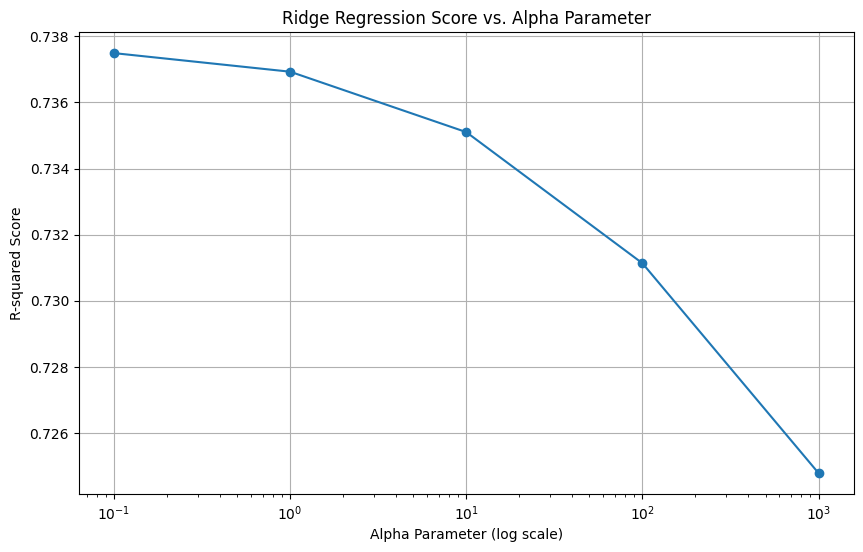

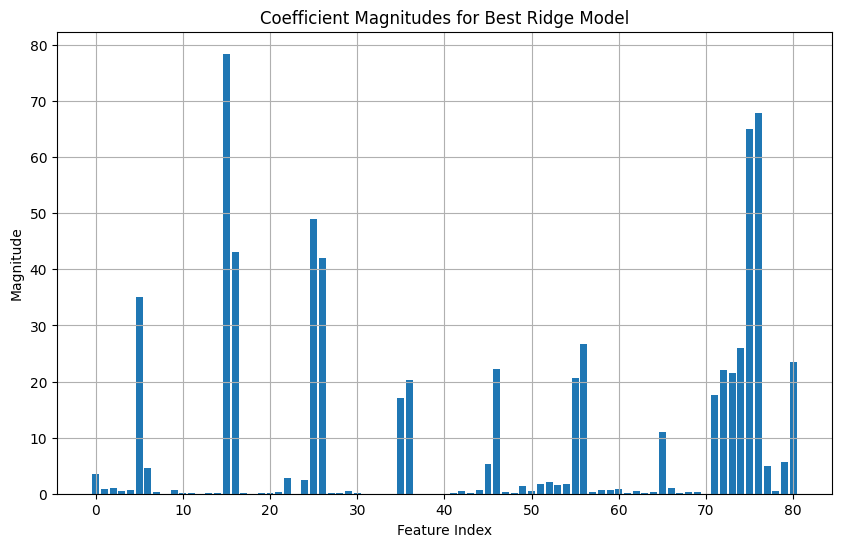

In [209]:
param_values = [0.1, 1.0, 10.0, 100.0, 1000.0]  # Values to try for the alpha parameter in Ridge Regression
ridge_scores = []  # Store scores for each parameter value
ridge_coefs = []  # Store coefficient magnitudes for each parameter value

for alpha in param_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_scores.append(r2_score(y_test, ridge_pred))
    ridge_coefs.append(np.abs(ridge.coef_))

# Plot the scores as a function of the alpha parameter
plt.figure(figsize=(10, 6))
plt.semilogx(param_values, ridge_scores, marker='o')
plt.title("Ridge Regression Score vs. Alpha Parameter")
plt.xlabel("Alpha Parameter (log scale)")
plt.ylabel("R-squared Score")
plt.grid(True)
plt.show()

# Find the best alpha parameter
best_alpha = param_values[np.argmax(ridge_scores)]
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Get coefficient magnitudes for the best model
best_coefs = np.abs(best_ridge.coef_)


# Plot coefficient magnitudes for the best model
plt.figure(figsize=(10, 6))
plt.bar(range(len(best_coefs)), best_coefs)
plt.title("Coefficient Magnitudes for Best Ridge Model")
plt.xlabel("Feature Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()